## Notes:

- use ".get()" when plotting cupy arrays. Otherwise a weird error occurs 

In [1]:
#import cupy as cp
import numpy as np

from Scripts.activations import *
from Scripts.loss_functions import *
from Scripts.NeuralNetwork import *
from Scripts.Layers import *
from Scripts.data_generator import *
from Scripts.Clusters import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [6]:
inp = np.random.random_sample((32, 100))
W = np.random.random_sample((100, 5))

bias = np.expand_dims(np.ones(inp.shape[0]), -1)
inp = np.append(inp, bias, axis=1)

print(inp.shape)

(32, 101)


In [2]:
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:16.3f}'.format}, linewidth=130)

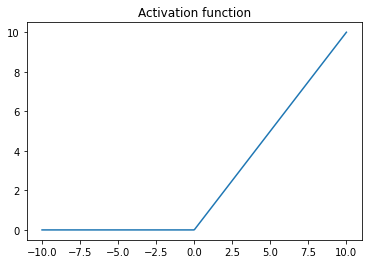

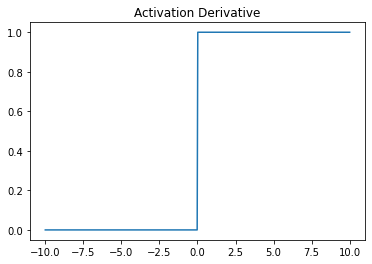

In [3]:
# Method used for mapping multiple values to the get_derivative method.
def test_approximation(x):
    return get_derivative(activation, x)

activation = relu
limit = 10
line = cp.linspace(-limit, limit, num = 500)

#y = np.array(list(map(activation, line))).get()
y = activation(line)

plt.title("Activation function")
plt.plot(line.get(), y.get())
plt.show()

plt.title("Activation Derivative")

y = test_approximation(line)
plt.plot(line.get(), y.get())
plt.show()


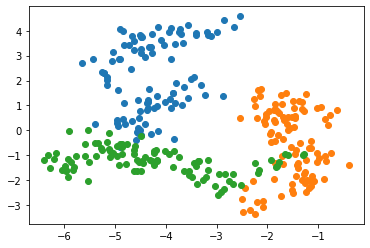

In [4]:
data, labels = generate_dense(100, classes = 3, dim = 3)
# One hot encoding

enc_labels = []
for i in range(len(labels)):
    enc_vec = np.zeros(len(np.unique(labels)))
    enc_vec[int(labels[i])] = 1
    enc_labels.append(enc_vec)
enc_labels = np.array(enc_labels)

for l in np.unique(labels):
    c = data[labels == l]
    plt.scatter(c.T[0].get(), c.T[1].get())
plt.show()

In [5]:
def make_model(batch_size = 64):
    np.random.seed(0)
    #loss = Cluster(None, n = 8)
    loss = MSE()
    model = Model(loss = loss)
    
    
    model.add(fullyConnected((18, 3), activation= cont_sigmoid, bias = False))
    model.add(dropout(rate = 0.1))
    
    model.add(partiallyConnected((6, 18), activation= cont_sigmoid, bias = True))
    
    model.add(fullyConnected((3, 6), activation= cont_sigmoid, bias = True))
    
    return model

model = make_model()
for i in range(len(model.layers[1].W)):
    plt.plot(model.layers[1].W[0])
    plt.show()

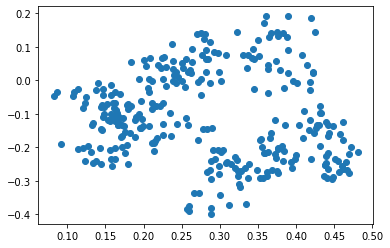

In [6]:
model = make_model()
batch_size = 512
preds = []
    
for i, d in enumerate(data):
    preds.append(model.predict(d))
    
preds = cp.array(preds)

plt.scatter(preds.T[0].get(), preds.T[1].get())
plt.show()

C:\Users\joels\AppData\Local\Temp\ipykernel_11880\3116136395.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


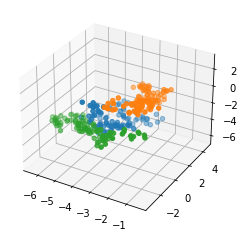

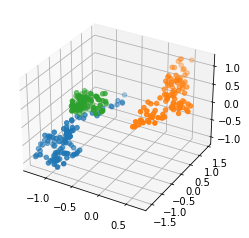

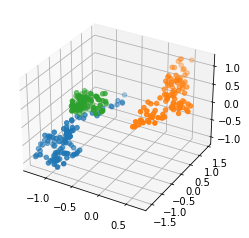

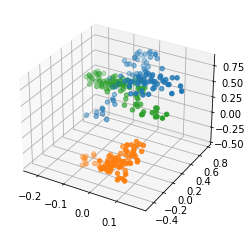

C:\Users\joels\AppData\Local\Temp\ipykernel_11880\3116136395.py:35: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


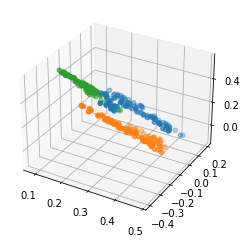

In [7]:
# Plot the latent transformation of the data in each layer (maximum 3 dimensions)

for layer in range(len(model.layers)):
    
    if layer-1 != -1:
        print(model.layers[layer-1])
    
    preds = []
    
    for i, p in enumerate(data):
        model.predict(p)
        preds.append(cp.array(model.layers[layer].signal))
    preds = cp.array(preds)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    for i in np.unique(labels):
        if len(preds[labels == i]) != 0:
            p = preds[labels == i].reshape(preds[labels == i].shape[0], preds[labels == i].shape[1])
            ax.scatter(p.T[0].get(), p.T[1].get(), p.T[2].get())
    plt.show()
    
    
preds = []
for i, p in enumerate(data):
    preds.append(model.predict(p))
    
    
preds = cp.array(preds).reshape(len(preds), len(preds[0]))

print(model.layers[-1])

fig = plt.figure()
ax = fig.gca(projection='3d')
for j in cp.unique(labels):
    p = preds[labels == j]
    ax.scatter(p.T[0].get(), p.T[1].get(), p.T[2].get())
plt.show()

0.0


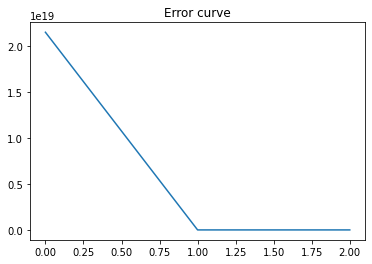

In [8]:
model.train(data, labels)